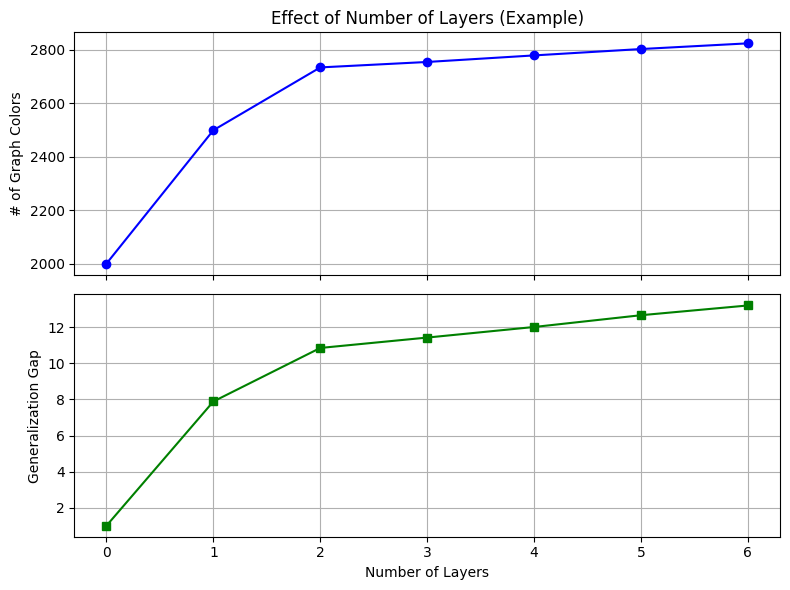

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# X values: Number of Layers
x = np.arange(0, 7)

# Create y-values with steep increase up to x=2, then slower increase
def create_y_values(start, steep_increase=3, shallow_increase=0.5):
    y = [start]
    for i in range(1, len(x)):
        if i < 3:
            y.append(y[-1] + steep_increase - np.random.random_sample()*0.5*i*steep_increase)
        else:
            y.append(y[-1] + shallow_increase + np.random.random_sample()*0.5*shallow_increase)
    return y

# Generate y-values
y_histograms = create_y_values(start=2000, steep_increase=500, shallow_increase=20)
y_gap = create_y_values(start=1, steep_increase=7, shallow_increase=0.5)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot Number of Histograms
ax1.plot(x, y_histograms, marker='o', color='blue')
ax1.set_ylabel("# of Graph Colors")
ax1.set_title("Effect of Number of Layers (Example)")
ax1.grid(True)

# Plot Generalization Gap
ax2.plot(x, y_gap, marker='s', color='green')
ax2.set_xlabel("Number of Layers")
ax2.set_ylabel("Generalization Gap")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

df = pd.read_csv('NCI1.csv', index_col=0)
df[df['layer'] == 0]

,it,test,train,diff,layer,rad_complexity,num_histograms
0,0,47.688564,50.310895,2.62233,0,0.000973,2889


In [38]:
avg_gen_gap = []
avg_rad_complexity = []
num_histograms = []

for i in range(7):
    sub_df = df[df['layer'] == i]
    avg_gen_gap.append(sub_df['diff'].mean())
    avg_rad_complexity.append(sub_df['rad_complexity'].mean())
    num_histograms.append(sub_df['num_histograms'].mean())

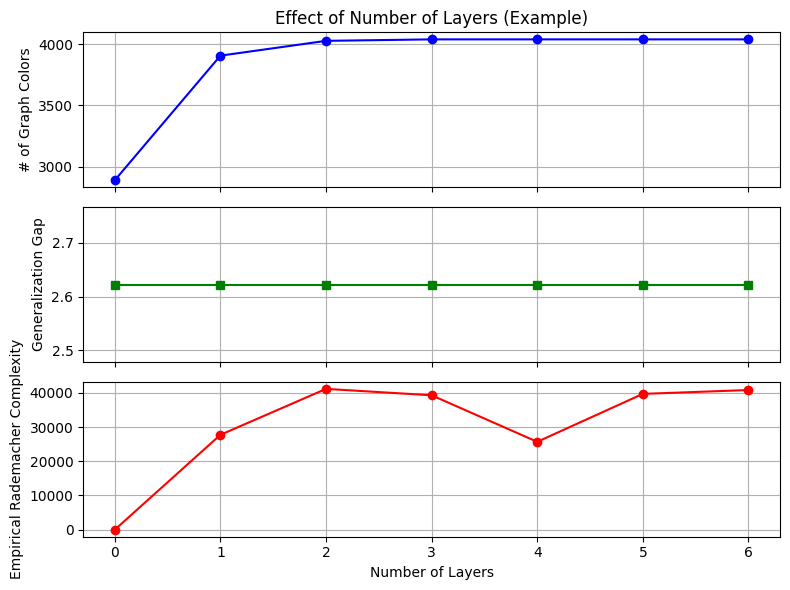

In [41]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
x = np.arange(0,7)

# Plot Number of Histograms
ax1.plot(x, num_histograms, marker='o', color='blue')
ax1.set_ylabel("# of Graph Colors")
ax1.set_title("Effect of Number of Layers (Example)")
ax1.grid(True)

# Plot Generalization Gap
ax2.plot(x, avg_gen_gap, marker='s', color='green')
ax2.set_ylabel("Generalization Gap")
ax2.grid(True)

# Plot Rademacher Bounds
ax3.plot(x, avg_rad_complexity, marker='o', color='red')
ax3.set_xlabel("Number of Layers")
ax3.set_ylabel("Empirical Rademacher Complexity")
ax3.grid(True)

plt.tight_layout()
plt.show()